In [21]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt

# set the CARMA model parameters
sigmay = 2.3  # dispersion in the time series
p = 5  # order of the AR polynomial
mu = 17.0  # mean of the time series
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0])  # widths of of Lorentzian components
qpo_cent = np.array([1.0/5.0, 1.0/25.0])  # centroids of Lorentzian components
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) # compute the roots r_k from the Lorentzian function parameters
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
# convert CARMA model variance to variance in the driving white noise
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)  # carma_variance computes the autcovariance function

Text(0,0.5,'magnitud')

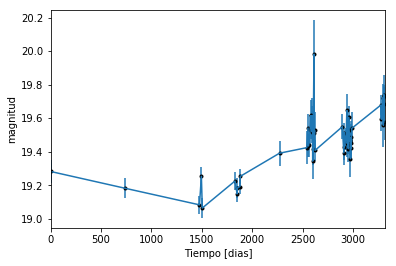

In [22]:
data = np.genfromtxt('LC_Z_141827.dat')
juldate = data[:,0]  # time is given by the julian date
t = juldate - juldate.min()  # set first time value to zero for convenience. units of t are days.
y = data[:,1]  # i-band magnitudes
yerr = data[:,2]  # standard deviation in the measurement noise

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('magnitud')

In [23]:
model = cm.CarmaModel(t, y, yerr, p=5, q=4)

In [24]:
%%capture capt
sample = model.run_mcmc(20000)

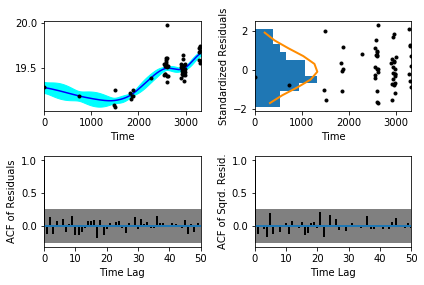

In [25]:
sample.assess_fit()

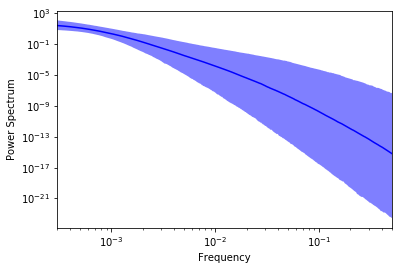

In [26]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [27]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.573591,'Nivel de ruido')

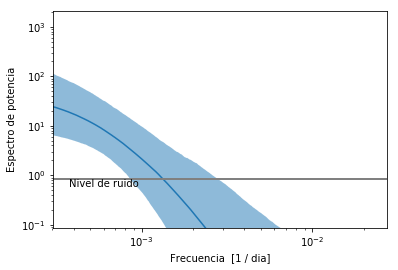

In [28]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia')
plt.xlabel('Frecuencia  [1 / dia]')
plt.annotate("Nivel de ruido", (1.25* plt.xlim()[0], noise_level / 1.5))

In [29]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [30]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 5)

In [31]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 659.914814257
Median: 0.00127941314004
Standard deviation: 0.222700351665
68% credibility interval: [ 0.          0.27940764]
95% credibility interval: [ 0.         0.8349704]
99% credibility interval: [ 0.          0.95173019]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 659.914814257
Median: 0.00127941314004
Standard deviation: 0.222700351665
68% credibility interval: [ 0.          0.27940764]
95% credibility interval: [ 0.         0.8349704]
99% credibility interval: [ 0.          0.95173019]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 582.502362916
Median: 0.0
Standard deviation: 0.0188636317003
68% credib

Plotting parameter summary


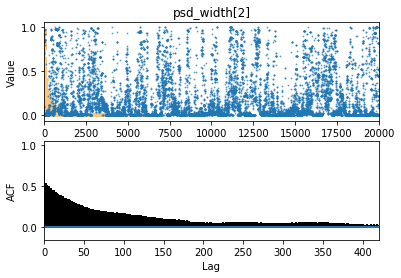

In [32]:
sample.plot_parameter('psd_width', 2, doShow=True)

In [33]:
centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [34]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1254.39513914
Median: 78.2744982786
Standard deviation: 1.63566377755
68% credibility interval: [ 76.36288403  79.4033922 ]
95% credibility interval: [ 73.92198952  80.03593092]
99% credibility interval: [ 71.82320358  80.24771842]


In [35]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 6)

In [36]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 319.414686703
Median: 1.3217688599
Standard deviation: 2.23975746018
68% credibility interval: [ 0.17694581  4.66798286]
95% credibility interval: [ 0.02829472  7.36830927]
99% credibility interval: [  0.0161494   10.16996713]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 957.719001446
Median: 0.558095247911
Standard deviation: 7.94641780159
68% credibility interval: [ 0.03184314  7.38769142]
95% credibility interval: [  1.81334372e-0

In [37]:
centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 5)

In [38]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0310432
Median: 9.64970836198e-39
Standard deviation: 2.97328694175e+32
68% credibility interval: [  2.79070906e-62   2.09078010e-18]
95% credibility interval: [  5.56204937e-83   1.13628859e-01]
99% credibility interval: [  5.21246424e-98   1.17739483e+01]
Posterior summary for parameter ma_coefs  element 2
----------------------------------------------
Effective number of independent samples: 20020.0310431
Median: 5.80157972479e-10
Standard deviation: 1.21576498001e+61
68% credibility interval: [  3.12872718e-29   4.44

In [39]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [40]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1545.82814381
Median: 19.3597313111
Standard deviation: 0.127099731461
68% credibility interval: [ 19.25579755  19.47055858]
95% credibility interval: [ 19.10659429  19.62625309]
99% credibility interval: [ 18.97488292  19.77542659]


In [41]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 5)

In [42]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 659.914814257
Median: 0.00127941314004
Standard deviation: 0.222700351665
68% credibility interval: [ 0.          0.27940764]
95% credibility interval: [ 0.         0.8349704]
99% credibility interval: [ 0.          0.95173019]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 659.914814257
Median: 0.00127941314004
Standard deviation: 0.222700351665
68% credibility interval: [ 0.          0.27940764]
95% credibility interval: [ 0.         0.8349704]
99% credibility interval: [ 0.          0.95173019]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 582.502362916
Median: 0.0
Standard deviation: 0.0188636317003
68% credib

In [43]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [44]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1254.39513914
Median: 78.2744982786
Standard deviation: 1.63566377755
68% credibility interval: [ 76.36288403  79.4033922 ]
95% credibility interval: [ 73.92198952  80.03593092]
99% credibility interval: [ 71.82320358  80.24771842]


In [45]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 5)

In [46]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 347.781698382
Median: 0.00741462174142
Standard deviation: 0.187474503951
68% credibility interval: [ 0.00069412  0.1352976 ]
95% credibility interval: [  3.26296089e-04   7.54307735e-01]
99% credibility interval: [  3.06501797e-04   9.61980093e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1308.7002943
Median: 0.00122019449616
Standard deviation: 0.0560939083006
68% credibility interval: [ 0.00038541  0.01676299]
95% credibility interval: [ 0.0003112   0.16316632]
99% credibility interval: [  3.02141579e-04   3.83410792e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 237.84038697
Median: 0.0481520539747
Standard d

In [47]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [48]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1211.39814068
Median: 0.0387834264985
Standard deviation: 0.0491373004735
68% credibility interval: [ 0.02142424  0.07715031]
95% credibility interval: [ 0.01286839  0.16648416]
99% credibility interval: [ 0.00969264  0.32588851]


In [49]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [50]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2131.82623613
Median: 0.987703228647
Standard deviation: 0.147179376201
68% credibility interval: [ 0.86093084  1.14938846]
95% credibility interval: [ 0.75373119  1.3241465 ]
99% credibility interval: [ 0.693483    1.44066994]


In [51]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [52]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1139.21284785
Median: 2.43433325089e-06
Standard deviation: 0.167919681642
68% credibility interval: [  3.25512649e-08   2.29266190e-04]
95% credibility interval: [  6.19696213e-10   8.60439097e-03]
99% credibility interval: [  5.88437882e-11   1.29569548e-01]


In [53]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 5)

In [54]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 347.781698382
Median: (-0.046587442384-0.161273025523j)
Standard deviation: 1.8290668233
68% credibility interval: [-0.85009989+0.j -0.00436126+0.j]
95% credibility interval: [ -4.73945528e+00+0.j          -2.05017879e-03-0.32806813j]
99% credibility interval: [ -6.04429919e+00+0.j          -1.92580759e-03-0.00171937j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1308.7002943
Median: (-0.00766670813018+0.38017325724j)
Standard deviation: 1.44297250233
68% credibility interval: [-0.10532494+0.22354102j -0.00242162+0.00047348j]
95% credibility interval: [-1.02520420+0.6970236j -0.00195534+0.j       ]
99% credibility interval: [ -2.40904106e+00+2.35447516j  -1.89841153e-03+0.00525636j]
Posterior summary for parameter a

Plotting 2d PDF w KDE


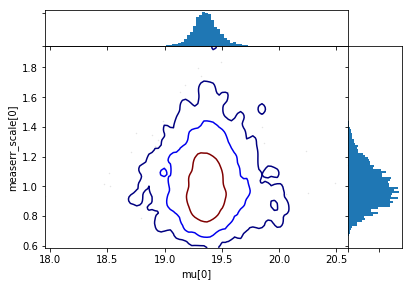

In [55]:
sample.plot_2dkde('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


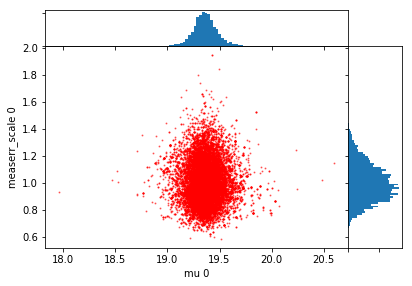

In [56]:
sample.plot_2dpdf('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


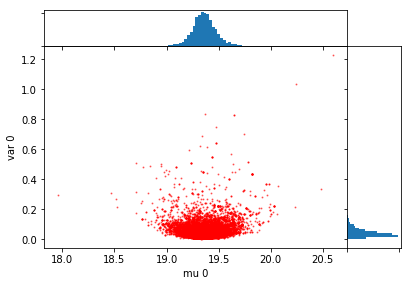

In [57]:
sample.plot_2dpdf('mu', 'var', doShow=True)

Plotting 2d PDF w KDE


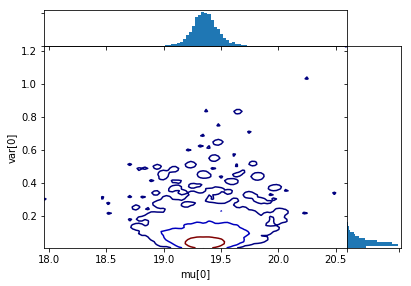

In [58]:
sample.plot_2dkde('mu', 'var', doShow=True)

Text(0.5,1,'Interpolacion, camino simulado')

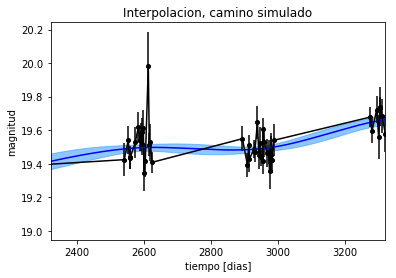

In [59]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

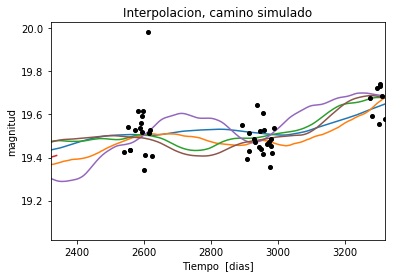

In [60]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 6
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')